# windowsを想定しています

windows11でmujocoを使用し， 
   
・自分が物理演算させたいものを物理演算して，  
・その動いてる様子を可視化して，  
・ほしいデータを取り，分析したりなんなり  
  
して研究に使用することが簡単にできるようにします．

インストール方法  
① 任意の仮想環境で
pip install mujoco  

②windows版mujocoを公式サイト（https://github.com/google-deepmind/mujoco/releases）
からダウンロードし，解凍したファイルを以下に保存して，パスを通す．
C:user/(自分のユーザー名)/.mujoco/mujoco210/bin  
パスの通し方解説サイト：（https://atmarkit.itmedia.co.jp/ait/articles/1805/11/news035.html）  
これで準備完了
レンダリングに必要なffmpegも，ダウンロードして同じようにpathを通せば動きます．  
mediapyはpip install mediapyでok

## ！！重要事前知識！！
mujocoは，2021年くらいにgoogleのdeepmindに買収されるまでは有料ソフトでした．  
そして当時はmujoco(c++?)とmujoco-py(python)の２つに分かれていました.  
現在はmujocoとmujoco-pyは統合され，mujocoのpythonバインディングとしてmujoco内に用意されているので，  
mujocoを入れるだけでpythonでmujocoを使用することができます．  

上記のような経緯があるため，ネットでmujocoについて調べていると，買収前の当時の情報が出てきてしまいます．その情報の日付を確認するなど注意するようにしてください．

# 動作確認

In [ ]:
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

In [ ]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 3.8  # (seconds)
framerate = 60  # (Hz)

frames = []
mujoco.mj_resetData(model, data)
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, scene_option=scene_option)
    pixels = renderer.render()
    frames.append(pixels)

# Simulate and display video.
media.show_video(frames, fps=framerate)

# 楓君環境

In [ ]:
import gymnasium as gym
import numpy as np
from tqdm import trange
# from gym import wrappers

ALPHA = 0.5 
GAMMA = 0.99 # 割引率
EPSILON = 0.02 # ε-greedy法のε

num_epospdes = 1000
max_step = 1000

env = gym.make('InvertedPendulum-v4', render_mode="human")
observation, info = env.reset()


for _ in trange(500): #iとかの繰り返しカウント変数を用意しない書き方
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()



# first_step ブロックを落としてデータを取ってみる

""

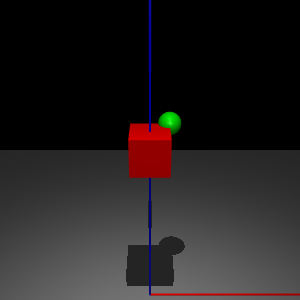

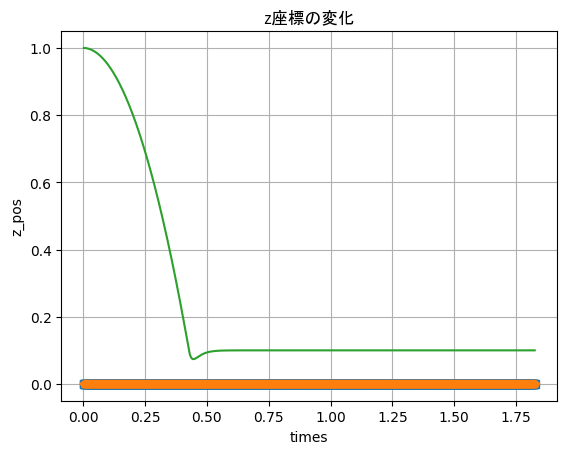

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3" mode="trackcom"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
      <camera name="fixed" pos="0 -1.6 .8" xyaxes="1 0 0 0 1 2"/>
    </body>
    <site type="box" rgba="1 0 0 1" fromto="0 0 0 2 0 0" />
    <site type="box" rgba="0 1 0 1" fromto="0 0 0 0 2 0" />
    <site type="box" rgba="0 0 1 1" fromto="0 0 0 0 0 2" />
  </worldbody>
</mujoco>
"""
cube_xpos = []
cube_ypos = []
cube_zpos = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube_xpos.append(data.qpos[0].copy())
    cube_ypos.append(data.qpos[1].copy())
    cube_zpos.append(data.qpos[2].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

plt.xlabel("times")
plt.ylabel("z_pos")
plt.grid()
plt.title("z座標の変化", fontname="MS Gothic")
plt.plot(times, cube_xpos, linestyle='solid', marker='s')
plt.plot(times, cube_ypos, linestyle='solid', marker='p')
plt.plot(times, cube_zpos, linestyle='solid', marker='h')
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.show()

data.qposとdata.geom_xposを比較する実験↓

""

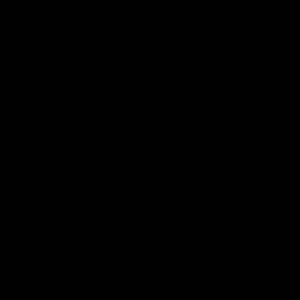

qpos= [ 1.87364471e-02 -3.45874662e-02  9.98923328e-02  9.95565525e-01
 -5.80250171e-05  4.80061706e-05  9.40706068e-02 -2.28484582e-01
  8.13726794e-01  9.98923319e-02 -7.07058626e-01 -7.07133515e-01
 -3.92937116e-03 -3.85364938e-03]
geom_xpos= [[ 0.          0.          0.        ]
 [ 0.01873645 -0.03458747  0.09989233]
 [ 0.09824437  0.08238582  0.19987103]
 [-0.22848458  0.81372679  0.09989233]
 [-0.12737921  0.71482299  0.19987103]]


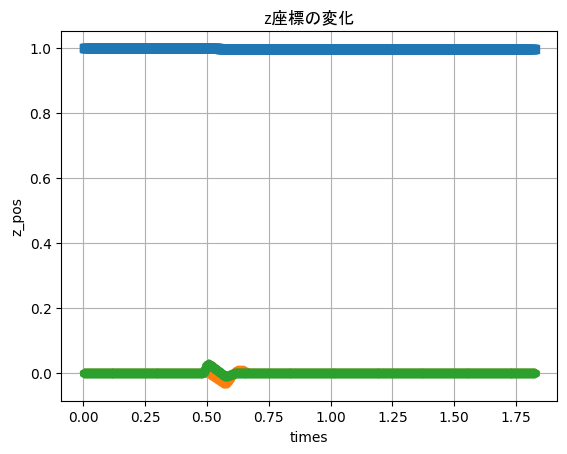

In [4]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt


xml = """
<mujoco>
  <worldbody>
    <light pos="0 -0.5 3" mode="trackcom"/>
    <geom name="ground" type="plane" pos="0 0 0" size="2 2 .1"  />
    <body name="box_and_sphere" pos="0 0 1">
      <freejoint/>
      <geom name="red_box" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <body name="box_and_sphere2" pos="0 0.2 1.5">
      <freejoint/>
      <geom name="red_box2" type="box" size=".1 .1 .1" rgba="1 0 0 1"/>
      <geom name="green_sphere2" size=".06" pos=".1 .1 .1" rgba="0 1 0 1"/>
    </body>
    <site type="box" rgba="1 0 0 0.2" fromto="0 0 0 2 0 0" size="0.02"/>
    <site type="box" rgba="0 1 0 0.2" fromto="0 0 0 0 2 0" size="0.02"/>
    <site type="box" rgba="0 0 1 0.2" fromto="0 0 0 0 0 2" size="0.02"/>
  </worldbody>
</mujoco>
"""
cube_xpos = []
cube_ypos = []
cube_zpos = []
times = []
frames = []
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "fixed")
media.show_image(renderer.render())

# simulate and render
for i in range(220):
  while data.time < i/120.0: #1/4x real time　１２０ステップ進めてから，こまどりを保存する仕組み？
    mujoco.mj_step(model, data)
    times.append(data.time) #時間の値をリストに格納
    cube_xpos.append(data.qpos[3].copy())
    cube_ypos.append(data.qpos[4].copy())
    cube_zpos.append(data.qpos[5].copy())
    # print(angular_velocity[2,2])
  renderer.update_scene(data,)
  frame = renderer.render()
  frames.append(frame)

# print(angular_velocity[2][2])
# show video
media.show_video(frames, fps=60)

print("qpos=", data.qpos)
print("geom_xpos=", data.geom_xpos)

plt.xlabel("times")
plt.ylabel("z_pos")
plt.grid()
plt.title("z座標の変化", fontname="MS Gothic")
plt.plot(times, cube_xpos, linestyle='solid', marker='s')
plt.plot(times, cube_ypos, linestyle='solid', marker='p')
plt.plot(times, cube_zpos, linestyle='solid', marker='h')
# plt.plot(times, angular_velocity[2][2], linestyle='solid', marker='o')
plt.show()

比較の結果，data.qposは一次元ですべてのgeomの位置座標データを格納していて，qposの持っている7つのデータ（前３つが位置座標，後ろ４つがクオータニオンでの方向情報）であることが分かった．

そしてdata.geom_xposは，各geomごとの座標情報のみを，２次元のリストで格納していた．よって，geom_xposのほうが使いやすそう　物体の向きとか細かく見たいときはqposの出番というイメージを持った